<a href="https://colab.research.google.com/github/Mugeshkumar133/Singapore-Flat-Resale-Prediction/blob/main/Singapore_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986.0,255000.0,70,62.0
1,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986.0,275000.0,69,62.0
2,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986.0,310000.0,68,62.0
3,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986.0,253000.0,68,62.0
4,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986.0,290000.0,68,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20949,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2018-12,SENGKANG,5 ROOM,406C,FERNVALE RD,07 TO 09,110.0,Premium Apartment,2004.0,440000.0,85 years,80.0
20950,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2019-07,SENGKANG,5 ROOM,406C,FERNVALE RD,13 TO 15,110.0,Premium Apartment,2004.0,470000.0,84 years 05 months,80.0
20951,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2019-09,SENGKANG,5 ROOM,406C,FERNVALE RD,13 TO 15,110.0,Premium Apartment,2004.0,450000.0,84 years 03 months,80.0
20952,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2019-10,SENGKANG,4 ROOM,406C,FERNVALE RD,10 TO 12,90.0,Premium Apartment,2004.0,370000.0,84 years 03 months,80.0


In [4]:
df.dtypes

latitude               float64
longitude              float64
blk_no                   int64
road_name               object
postal_code            float64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
resale_price           float64
remaining_lease         object
lease_remain_years     float64
dtype: object

In [5]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            1
address                1
cbd_dist               1
min_dist_mrt           1
month                  1
town                   1
flat_type              1
block                  1
street_name            1
storey_range           1
floor_area_sqm         1
flat_model             1
lease_commence_date    1
resale_price           1
remaining_lease        1
lease_remain_years     1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
storey_median          0
dtype: int64


Minor Data Preprocessing for Combined Data

In [8]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986.0,255000.0,70,62.0,8.0
1,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986.0,275000.0,69,62.0,11.0
2,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986.0,310000.0,68,62.0,5.0
3,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986.0,253000.0,68,62.0,8.0
4,1.307435,103.854714,640,ROWELL ROAD,200640.0,174 ANG MO KIO AVE 4,2728.531219,0.0,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986.0,290000.0,68,62.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20948,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2018-07,SENGKANG,...,406C,FERNVALE RD,04 TO 06,91.0,Premium Apartment,2004.0,335000.0,85 years 05 months,80.0,5.0
20949,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2018-12,SENGKANG,...,406C,FERNVALE RD,07 TO 09,110.0,Premium Apartment,2004.0,440000.0,85 years,80.0,8.0
20950,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2019-07,SENGKANG,...,406C,FERNVALE RD,13 TO 15,110.0,Premium Apartment,2004.0,470000.0,84 years 05 months,80.0,14.0
20951,1.307435,103.854714,640,ROWELL ROAD,200640.0,406C FERNVALE RD,2728.531219,0.0,2019-09,SENGKANG,...,406C,FERNVALE RD,13 TO 15,110.0,Premium Apartment,2004.0,450000.0,84 years 03 months,80.0,14.0


In [9]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2728.531219,0.0,60.0,62.0,8.0,255000.0
1,2728.531219,0.0,60.0,62.0,11.0,275000.0
2,2728.531219,0.0,69.0,62.0,5.0,310000.0
3,2728.531219,0.0,45.0,62.0,8.0,253000.0
4,2728.531219,0.0,61.0,62.0,5.0,290000.0
...,...,...,...,...,...,...
20948,2728.531219,0.0,91.0,80.0,5.0,335000.0
20949,2728.531219,0.0,110.0,80.0,8.0,440000.0
20950,2728.531219,0.0,110.0,80.0,14.0,470000.0
20951,2728.531219,0.0,110.0,80.0,14.0,450000.0


In [10]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2728.531219,0.0,60.0,62.0,8.0,255000.0
1,2728.531219,0.0,60.0,62.0,11.0,275000.0
2,2728.531219,0.0,69.0,62.0,5.0,310000.0
3,2728.531219,0.0,45.0,62.0,8.0,253000.0
4,2728.531219,0.0,61.0,62.0,5.0,290000.0
...,...,...,...,...,...,...
20947,2728.531219,0.0,110.0,80.0,23.0,448000.0
20948,2728.531219,0.0,91.0,80.0,5.0,335000.0
20949,2728.531219,0.0,110.0,80.0,8.0,440000.0
20951,2728.531219,0.0,110.0,80.0,14.0,450000.0



Checking and Handling for Skewness in the Data

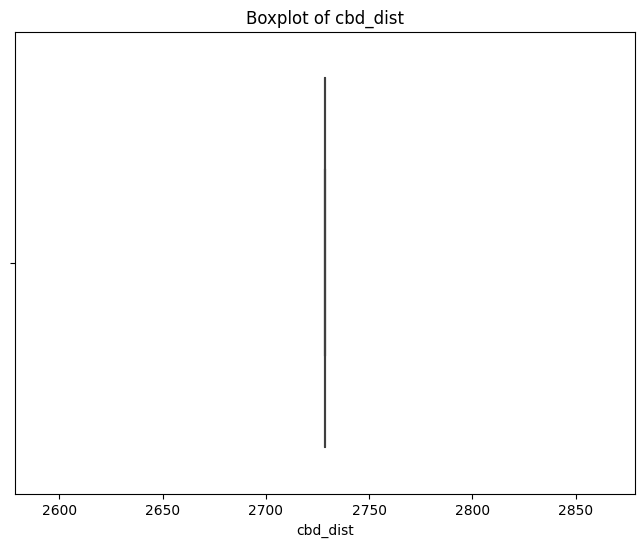

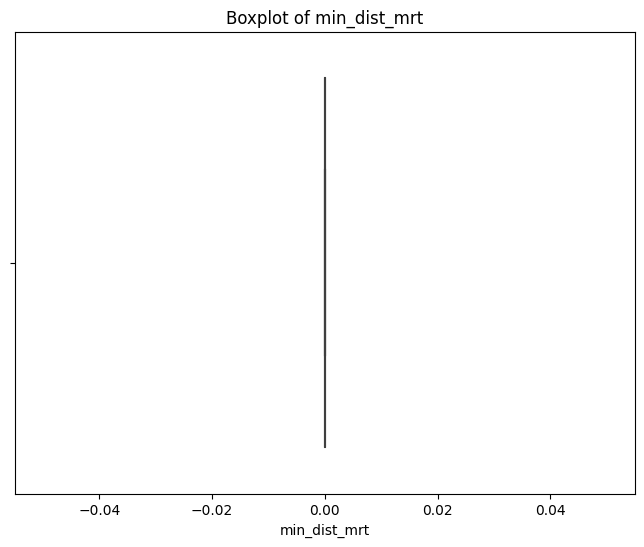

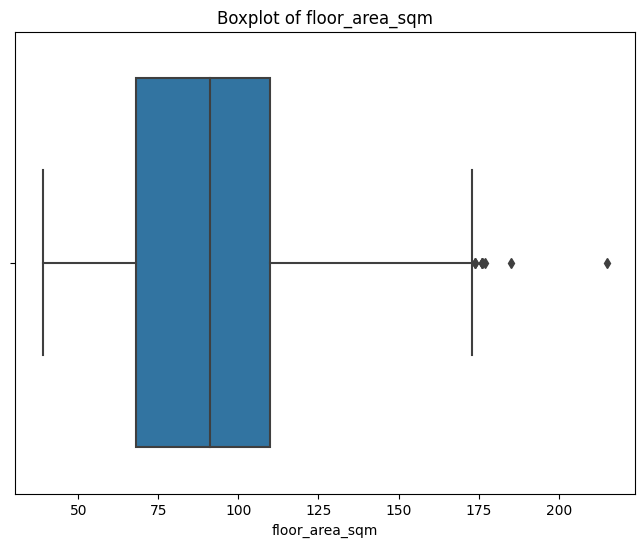

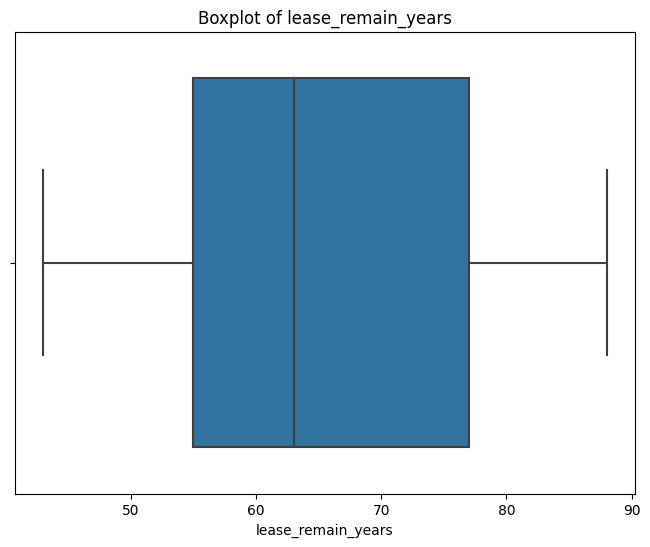

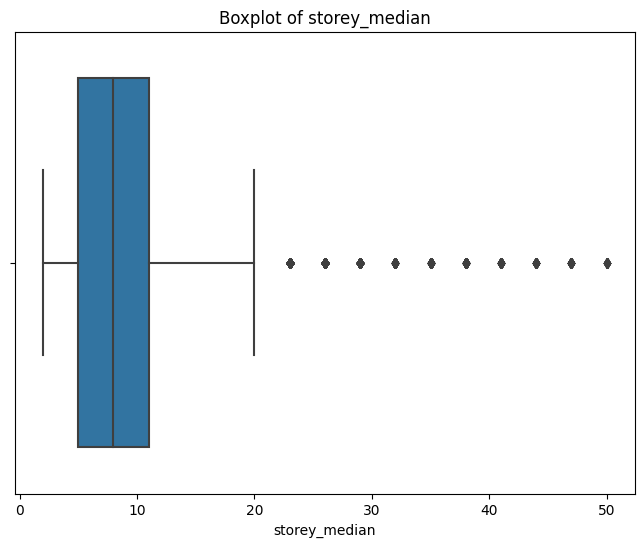

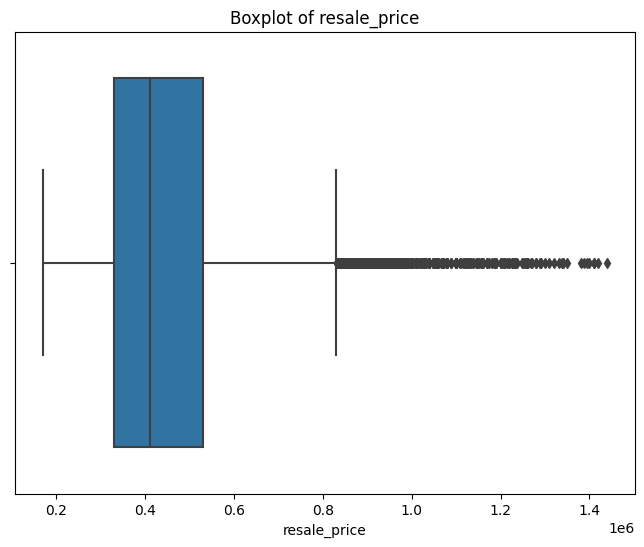

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [12]:
df1 = scope_df

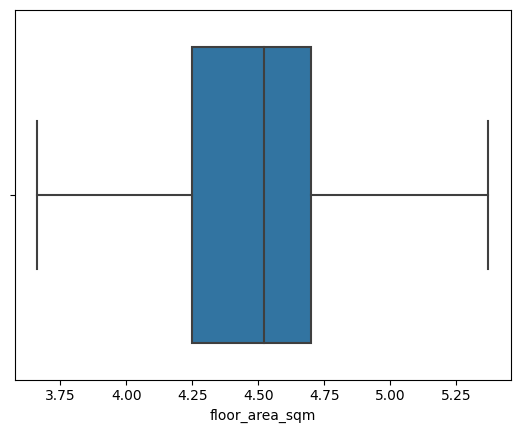

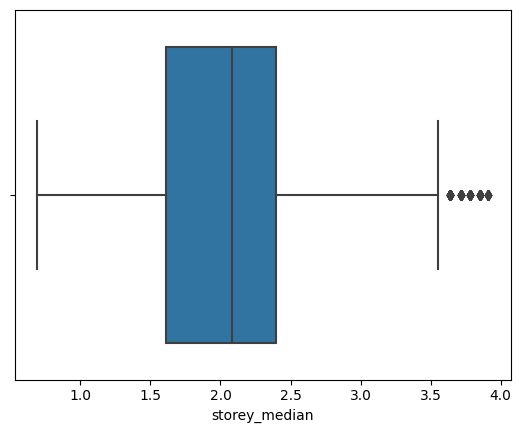

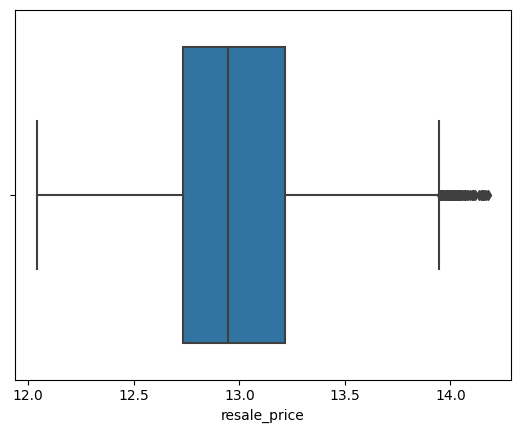

In [13]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
                                                                # effect on the data, so no need to apply for that columns

df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [14]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years    float64
storey_median         float64
resale_price          float64
dtype: object

Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

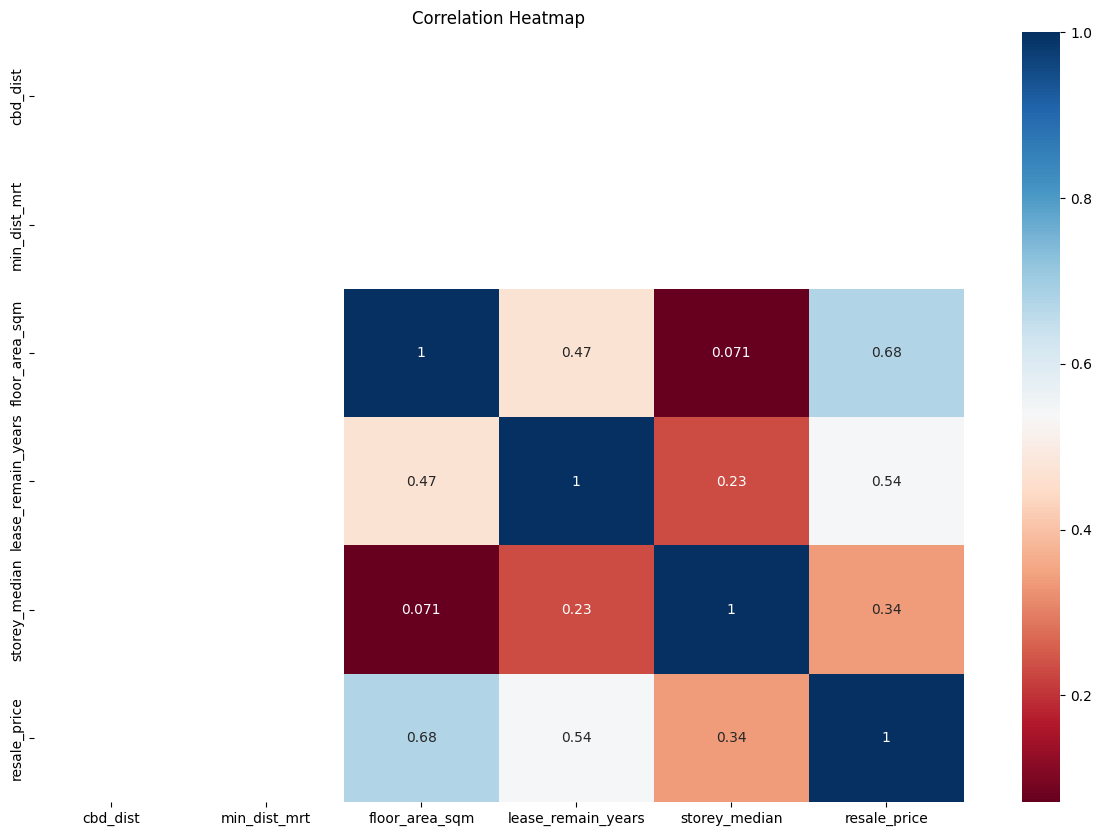

In [15]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

In [17]:
# Encoding Data
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1[['resale_price']]

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-4.547474e-13,0.0,-1.598874,-0.375026,0.131995
1,-4.547474e-13,0.0,-1.598874,-0.375026,0.559257
2,-4.547474e-13,0.0,-1.054010,-0.375026,-0.498597
3,-4.547474e-13,0.0,-2.720405,-0.375026,0.131995
4,-4.547474e-13,0.0,-1.534434,-0.375026,-0.498597
...,...,...,...,...,...
18538,-4.547474e-13,0.0,0.764153,1.136444,1.548876
18539,-4.547474e-13,0.0,0.024914,1.136444,-0.498597
18540,-4.547474e-13,0.0,0.764153,1.136444,0.131995
18541,-4.547474e-13,0.0,0.764153,1.136444,0.882818


Splitting the Data for Training and Testing Purposes

In [49]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=28)

Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 3}
 
Mean squared error: 0.027998765994611752
Mean Absolute Error 0.12818863488477528
Root Mean squared error: 0.16732831796982767
 
R-squared: 0.7758870477856992


In [51]:
# Testing Our Trained Model (Decision Tree Regressor)
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

234793.76356899447

In [52]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Another method of linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 0.00000000e+00 -8.32667268e-17  1.94520056e-01  7.97891746e-02
   8.55364787e-02]]


In [37]:
predictions = lm.predict( X_test)

In [38]:
print(predictions)

[[13.14172747]
 [12.91538018]
 [13.14521497]
 ...
 [13.01520906]
 [13.02937178]
 [12.95453215]]


Text(0, 0.5, 'Predicted Y')

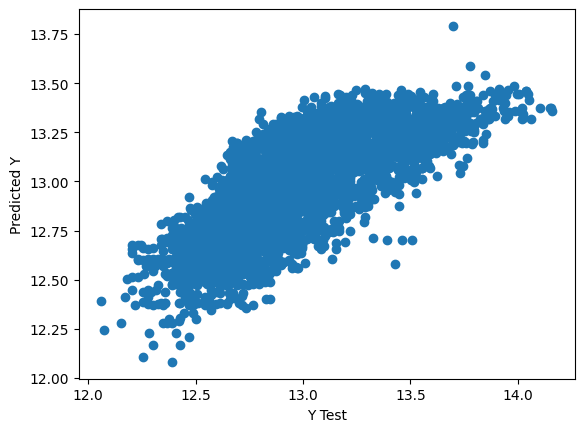

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18479870283803415
MSE: 0.05226149037393035
RMSE: 0.22860772159734752


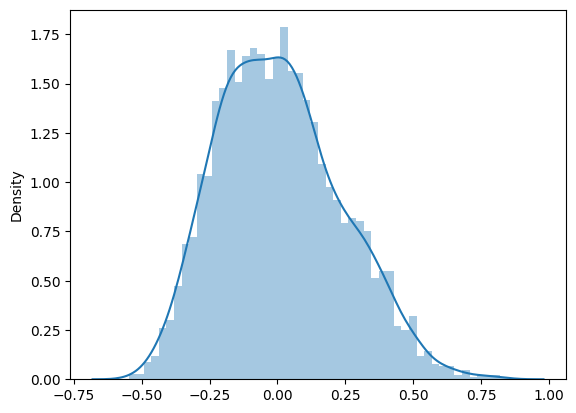

In [41]:
sns.distplot((y_test-predictions),bins=50);

In [43]:
r_squared = metrics.r2_score(y_test,predictions)

r_squared

0.5850837990685736